# Outreachy Data Science 

### Issue 6

#### Device Failue: Modeling Dataset - Feature Generation

The desire is to try to utilize the telemetry attributes to predict device failure in the field. This requires generating a feature set for use in modeling.

-  What are good features for modeling device failure?
-  How would you choose the best features?


In [2]:
#import libraries for faster performance and easier code.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
#load csv and assess data
df = pd.read_csv('../device-failure/device_failure.csv')
df.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date          124494 non-null int64
device        124494 non-null object
attribute1    124494 non-null int64
attribute2    124494 non-null int64
attribute3    124494 non-null int64
attribute4    124494 non-null int64
attribute5    124494 non-null int64
attribute6    124494 non-null int64
attribute7    124494 non-null int64
attribute8    124494 non-null int64
attribute9    124494 non-null int64
failure       124494 non-null int64
dtypes: int64(11), object(1)
memory usage: 11.4+ MB


This is a relatively clean data set, with no duplicated rows and no empty cells. As a result, data cleaning is not a major task here. We do not know what each attribute is for though, more information on the attributes themselves would make feature selection easier. 

In [5]:
df.describe()

,date,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,15106.222798,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,0.000851
std,78.412061,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.029167
min,15001.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,15040.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,0.000000
50%,15086.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,0.000000
75%,15168.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,0.000000
max,15306.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,1.000000


However, for most of the attributes there is a very large skew where the min value, 25% value, 50% value and 75% value are all 0 but the max is some very large number. <br>
**Is this a data cleaning issue? <br>
Answer** : We cannot say for sure as we do not now what the attributes are and what they values should be. As a result these values will not be touched. 
 
However, just by looking at the dataframe, I can see that the date field would be better off if separated which would generate a larger number of features. I am not a big fan of the date being in the integer format as it makes later analysis a pain

In [42]:
#copy data from original dataframe 
date_df = pd.DataFrame(df['date'])
#date_df.head()
#I am guessing the encoding is year and day of year in integer
date_df['strdate'] = date_df.date.astype(str)
date_df['year'] = date_df['strdate'].str[0:2]
date_df['dayofyear'] = date_df['strdate'].str[2:]
#adding back to the main df 
df['year'] = date_df['year']
df['dayofyear'] = date_df['dayofyear']
df.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure,year,dayofyear
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0,15,001
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0,15,001
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0,15,001
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0,15,001
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0,15,001


Device Failure attributes can be selected in two ways, considering them as independant variables and then considering them as dependant variables. 

#### Feature Selection for Independant Variables- Chi Squared Selection

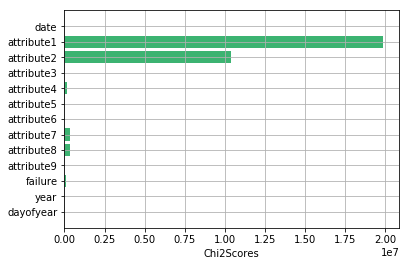

In [43]:
from sklearn.feature_selection import chi2

df_new = df.drop(['device'], axis = 1)
chi2score = chi2(df_new,df_new.failure)[0] #values

#plot results
fig, ax = plt.subplots() 
y_pos = np.arange(len(df_new.columns))
ax.barh(y_pos, chi2score, align='center',color='mediumseagreen', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(df_new.columns)
ax.invert_yaxis()
ax.set_xlabel('Chi2Scores')
plt.grid(True)
plt.show()


From the above figure we can see that attribute1 and attribute2 are the most important for our analysis. 

For independant variables we have lots of filters to apply:
1. Pearson's Correlation Filter 
2. Covariance Filter.
3. Missing Values Filter (although this dataset does not have any missing values) 

#### Feature Selection for Dependant Variables - Random Forest

/home/sando/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


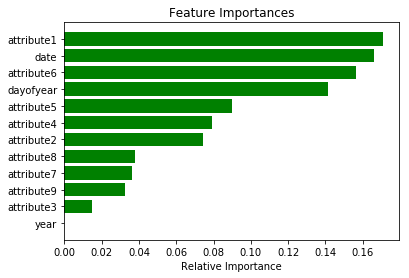

In [44]:
from sklearn.ensemble import RandomForestRegressor
new_df=df.drop(['device','failure'], axis=1) # dropping since all unique values
target = df['failure']
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(new_df,target)
features = new_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Here we can see more precisely, how important each feature is sorted based on impurity. We can see in bothe examples that attribute1 is ranked the highest. Thus, it would be suffice to say that the attribute 1 presents a larger benefit, if chosen.

As mention above for independant variables, there are other methods we can apply for dependant variables as well:
1.  Principal Component Analysis
2.  Backwards and Forwards Feature Selection 
3.  Recursive Feature Elimination (which I tried to perform but there are too many varibales and it would have taken too long)